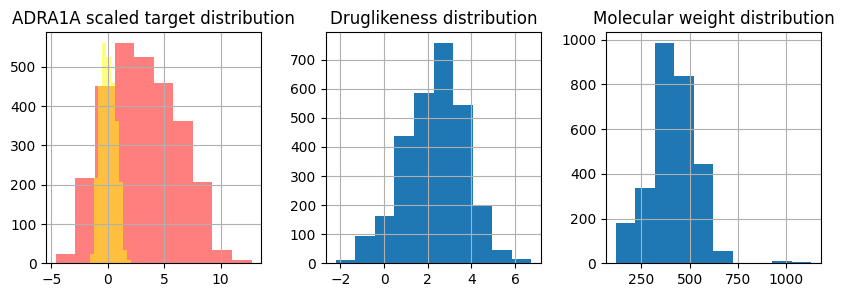

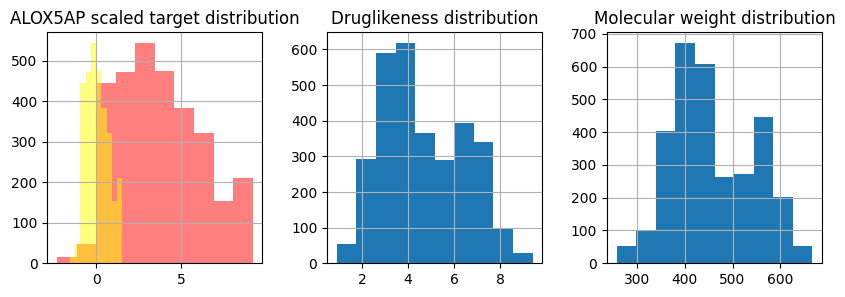

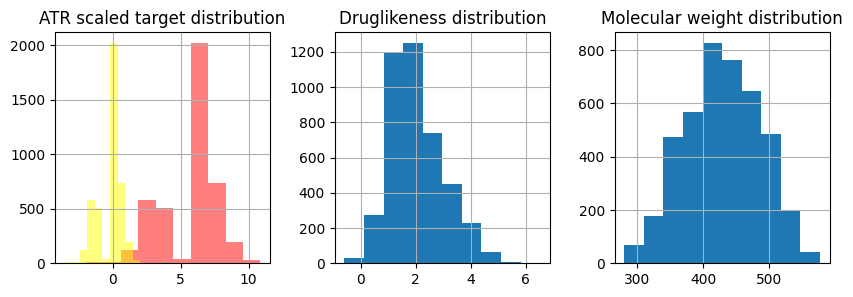

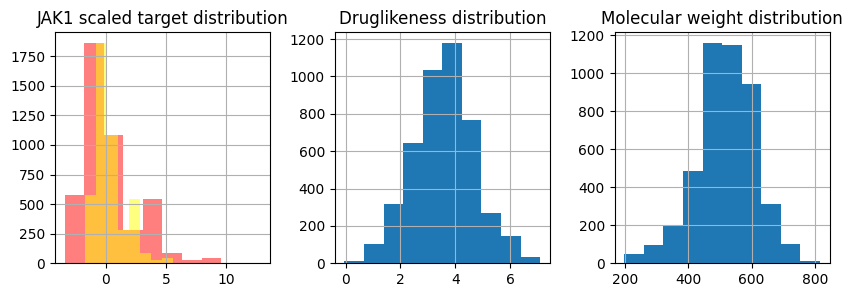

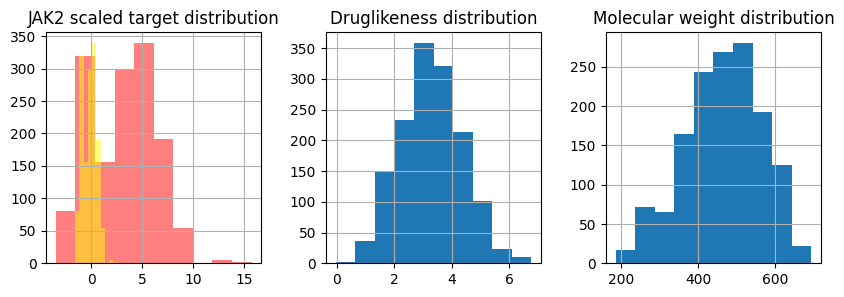

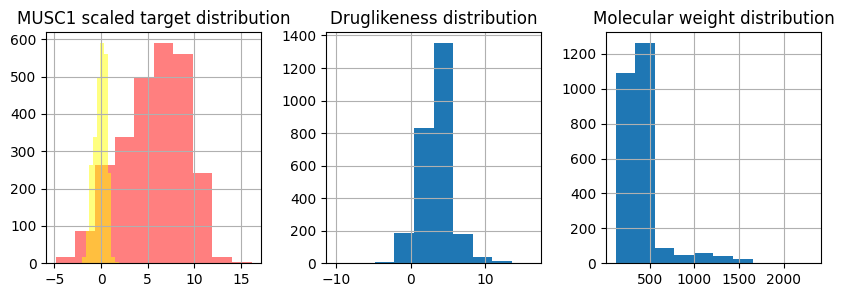

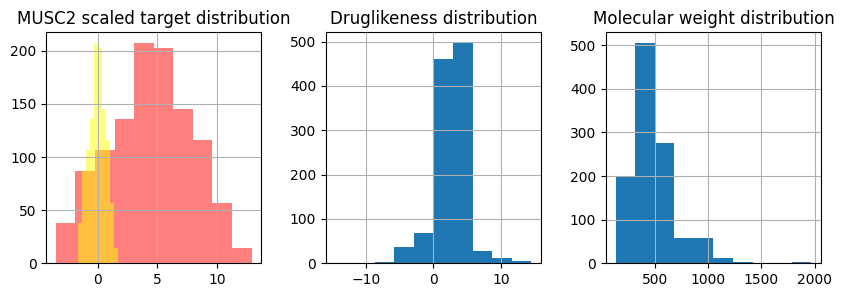

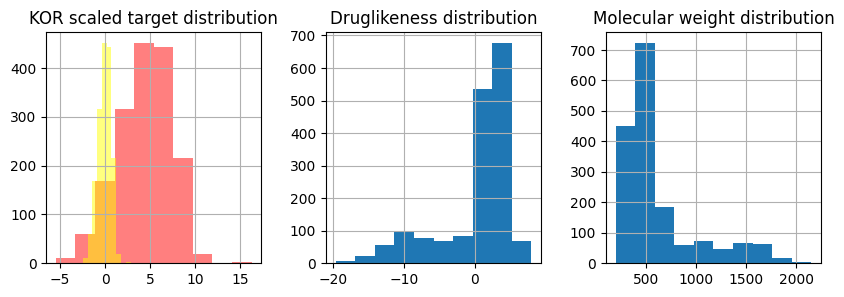

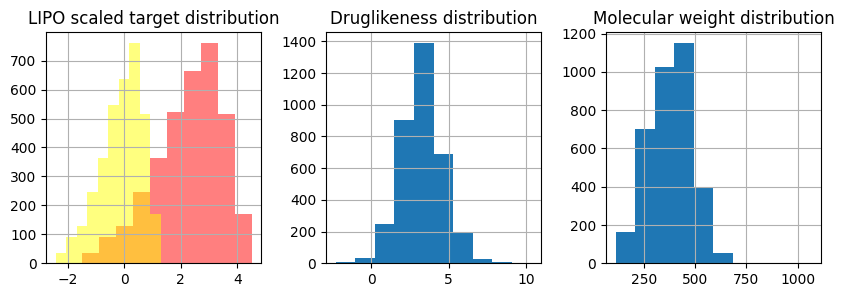

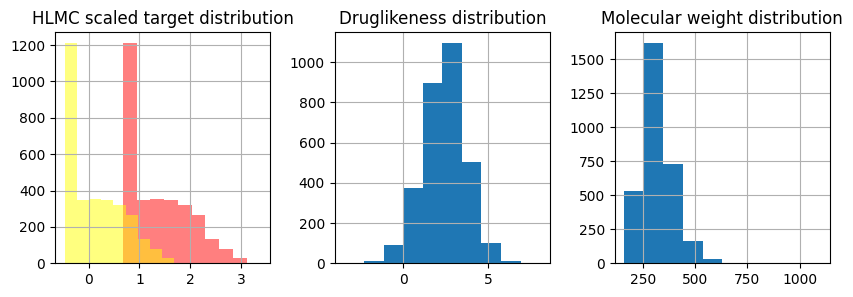

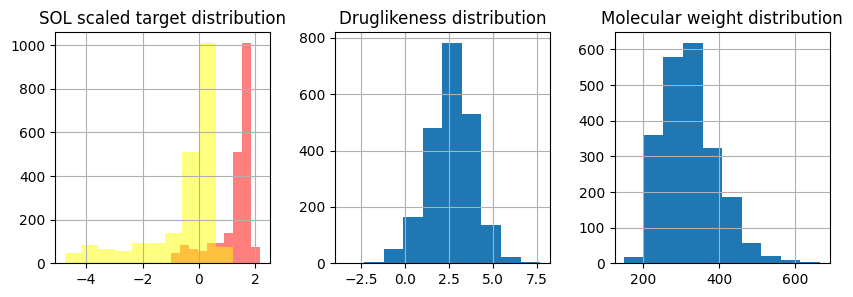

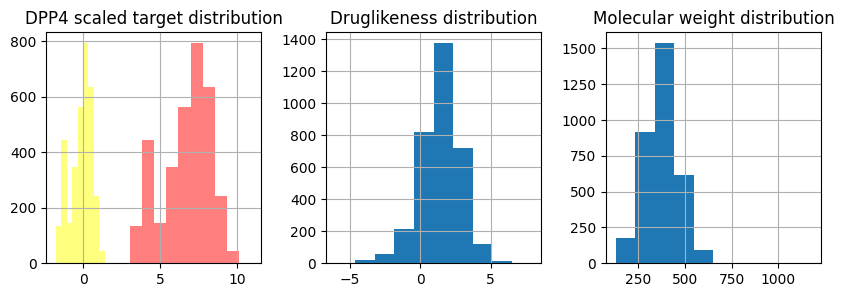

In [21]:
import sys
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors
from pathlib import Path
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

# Enable relative import
current_dir = Path().resolve()
sys.path.append(str(current_dir.parent))
from topolearn.datasets import * #notype

datasets = [load_adra1a_regression(return_mask=False)[0], 
            load_alox5ap_regression(return_mask=False)[0],
            load_atr_regression(return_mask=False)[0],
            load_jak1_regression(return_mask=False)[0],
            load_jak2_regression(return_mask=False)[0],
            load_musc1_regression(return_mask=False)[0],
            load_musc2_regression(return_mask=False)[0],
            load_kor_regression(return_mask=False)[0],
            load_lipo_regression(return_mask=False)[0],
            load_hlmc_regression(return_mask=False)[0],
            load_sol_regression(return_mask=False)[0],
            load_dpp4_regression(return_mask=False)[0]]

def compute_dataset_descriptors(smiles_list, return_mean=True):
    """
    Computes the QED descritors for a list of smiles.
    """
    druglikeness_scores = []
    mws = []
    for smiles in smiles_list:
        molecule = Chem.MolFromSmiles(smiles)
        druglikeness = Descriptors.MolLogP(molecule)
        mw = Descriptors.MolWt(molecule)
        druglikeness_scores.append(druglikeness)
        mws.append(mw)
    if return_mean:
        return np.array(druglikeness_scores).mean(), np.array(mws).mean()
    else:
        return druglikeness_scores, mws


for data in datasets:
    dataset_name = data["dataset"][0]

    fig, ax = plt.subplots(nrows=1, ncols=3)
    fig.set_figheight(3)
    fig.set_figwidth(10)

    # First plot: target dist
    data["target"].hist(alpha=0.5, color="red", ax=ax[0])
    ax[0].set_title(f"{dataset_name} scaled target distribution")
    transform_pipe = Pipeline([('robust_scaler', RobustScaler())])
    norm = transform_pipe.fit_transform(data["target"].values.reshape(-1, 1))
    # The normalized data is in yellow
    pd.DataFrame({"target": norm.squeeze()})["target"].hist(alpha=0.5, color="yellow", ax=ax[0])

    # Second plot: QED
    qed, mw = compute_dataset_descriptors(data["smiles"], return_mean=False)
    pd.DataFrame(qed).hist(ax=ax[1])
    ax[1].set_title(f"Druglikeness distribution")

    # Third plot: MW
    pd.DataFrame(mw).hist(ax=ax[2])
    ax[2].set_title(f"Molecular weight distribution")

    plt.show()